## Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv('C:/DOWLOAD/testKafka/wecode.data/annonimized.csv')
df.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [3]:
# Load điểm
df_ck = pd.read_csv('C:/DOWLOAD/testKafka/wecode.data/ck-public.csv')
df_qt = pd.read_csv('C:/DOWLOAD/testKafka/wecode.data/qt-public.csv')
df_th = pd.read_csv('C:/DOWLOAD/testKafka/wecode.data/th-public.csv')

# Gộp điểm
df_scores = df_ck.merge(df_qt, on='hash', how='outer', suffixes=('_CK', '_QT'))
df_scores = df_scores.merge(df_th, on='hash', how='outer').rename(columns={'CK': 'CK', 'QT': 'QT', 'TH': 'TH'})

# Gộp vào wecode
df['hash'] = df["concat('it001', username)"]
df_full = df.merge(df_scores, on='hash', how='inner')  # chỉ lấy sinh viên có điểm thật

In [4]:
df_full.head(n = 50)

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement,hash,CK,diemqt,TH
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:15:32,10-11 16:16:36,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:16:30,10-11 16:16:31,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:23:46,10-11 16:43:17,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5
3,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:25:55,10-11 16:25:56,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5
4,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:26:24,10-11 16:26:25,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5
5,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:29:15,10-11 16:29:15,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5
6,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:29:55,10-11 16:29:55,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5
7,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:31:38,10-11 16:31:38,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5
8,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:32:53,10-11 16:32:53,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5
9,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:34:04,10-11 16:34:05,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5


In [5]:
# Kiểm tra dữ liệu có trùng lặp
df_full.duplicated().any()

np.True_

In [6]:
# Kích thước dataset
row, column = df.shape
print(f"Row: {row}, Column: {column}")

Row: 295198, Column: 12


In [7]:
# Kích thước dataset
row, column = df_full.shape
print(f"Row: {row}, Column: {column}")

Row: 157040, Column: 15


In [8]:
df_full.isnull().sum()

concat('it001',`assignment_id`)     0
concat('it001',`problem_id`)        0
concat('it001', username)           0
is_final                            0
status                              0
pre_score                           0
coefficient                         0
concat('it001',`language_id`)       0
created_at                          0
updated_at                          0
judgement                           0
hash                                0
CK                                 67
diemqt                             67
TH                                 67
dtype: int64

In [9]:
df_full = df_full.dropna(subset=['CK',"diemqt","TH"])

In [10]:
df_full.isnull().sum()

concat('it001',`assignment_id`)    0
concat('it001',`problem_id`)       0
concat('it001', username)          0
is_final                           0
status                             0
pre_score                          0
coefficient                        0
concat('it001',`language_id`)      0
created_at                         0
updated_at                         0
judgement                          0
hash                               0
CK                                 0
diemqt                             0
TH                                 0
dtype: int64

Text(0, 0.5, 'Frequency')

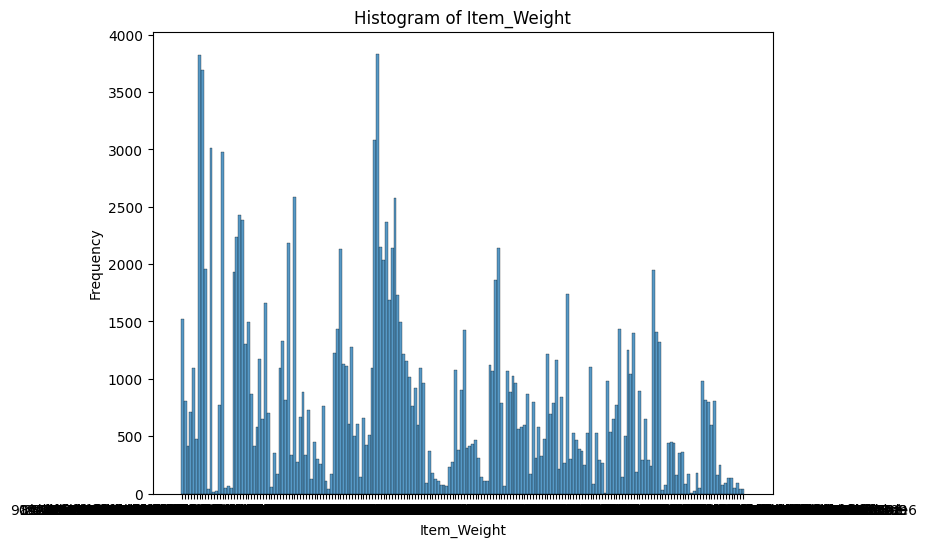

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df_full["concat('it001',`assignment_id`)"],bins=10)
plt.title("Histogram of Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

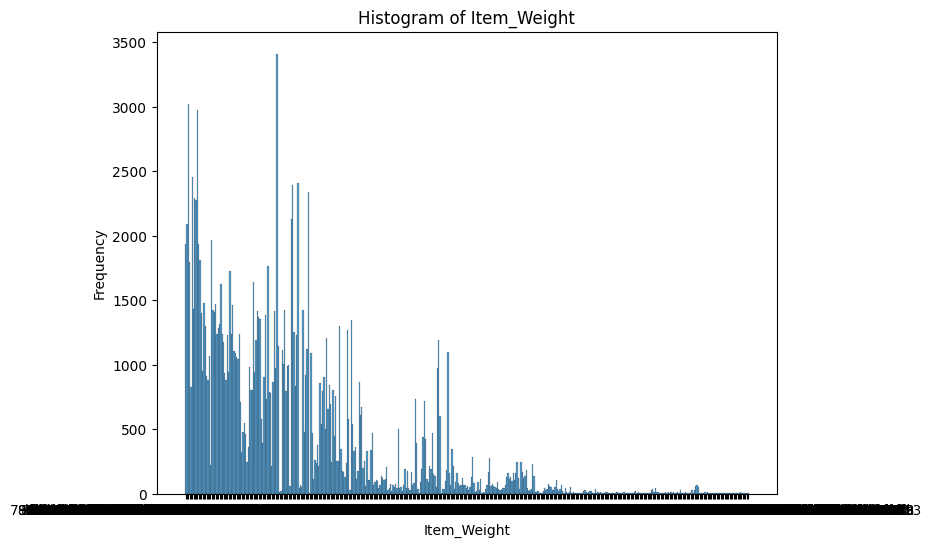

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df_full["concat('it001',`problem_id`)"],bins=10)
plt.title("Histogram of Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

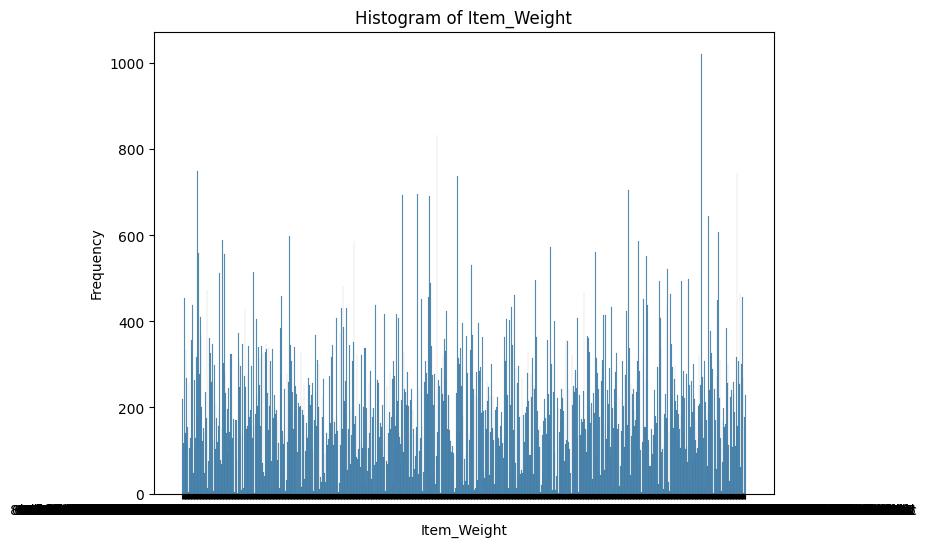

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df_full["concat('it001', username)"],bins=10)
plt.title("Histogram of Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

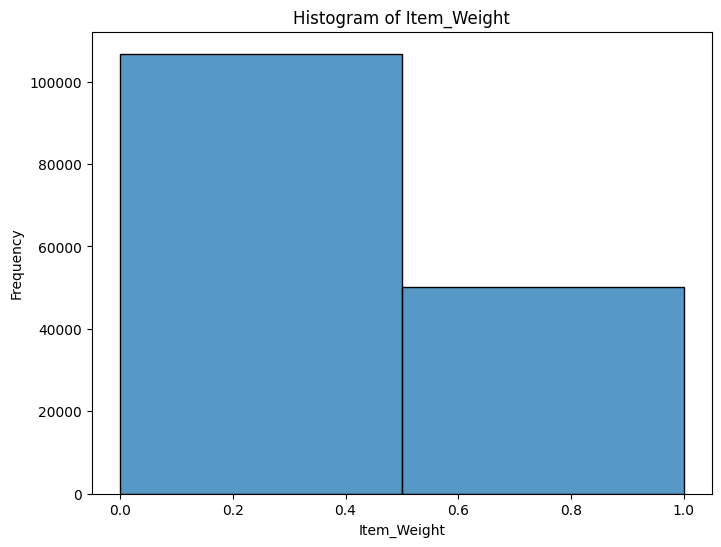

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df_full["is_final"],bins=2)
plt.title("Histogram of Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

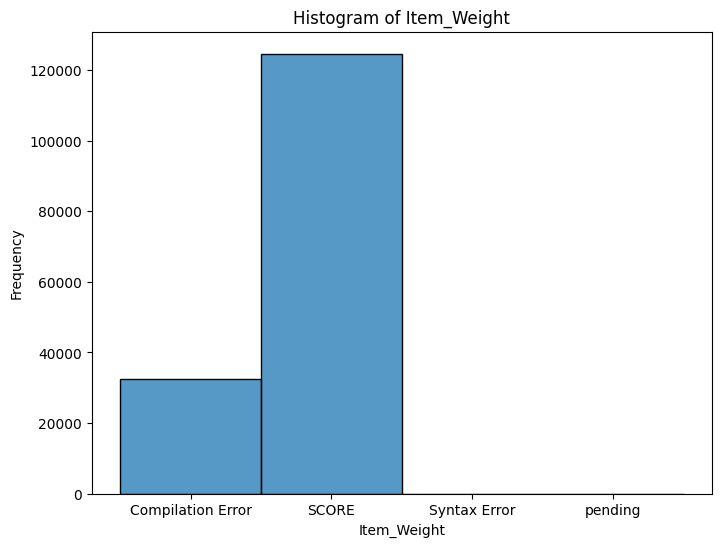

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df_full["status"],bins=4)
plt.title("Histogram of Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

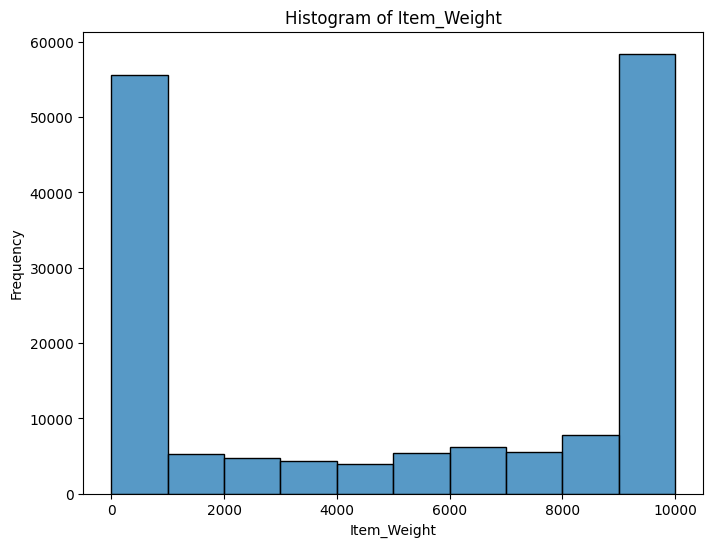

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df_full["pre_score"],bins=10)
plt.title("Histogram of Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

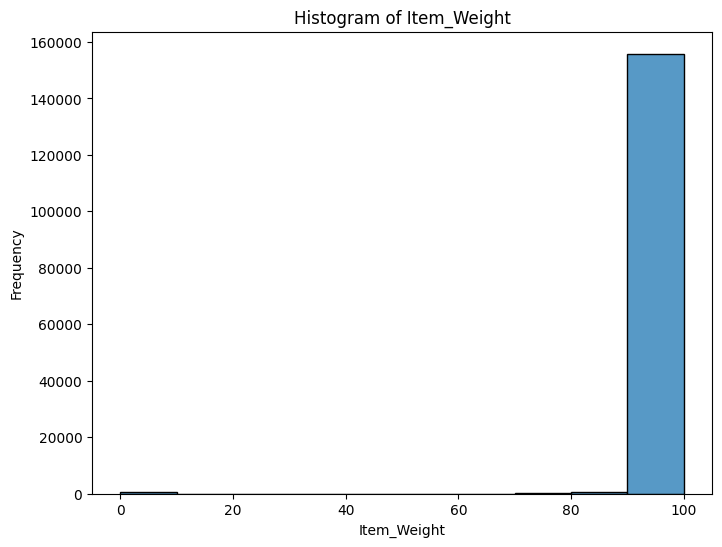

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df_full["coefficient"],bins=10)
plt.title("Histogram of Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

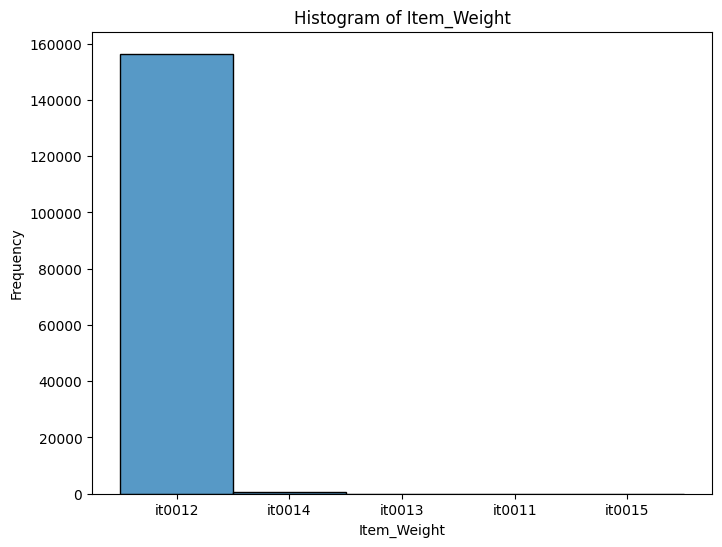

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df_full["concat('it001',`language_id`)"],bins=10)
plt.title("Histogram of Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

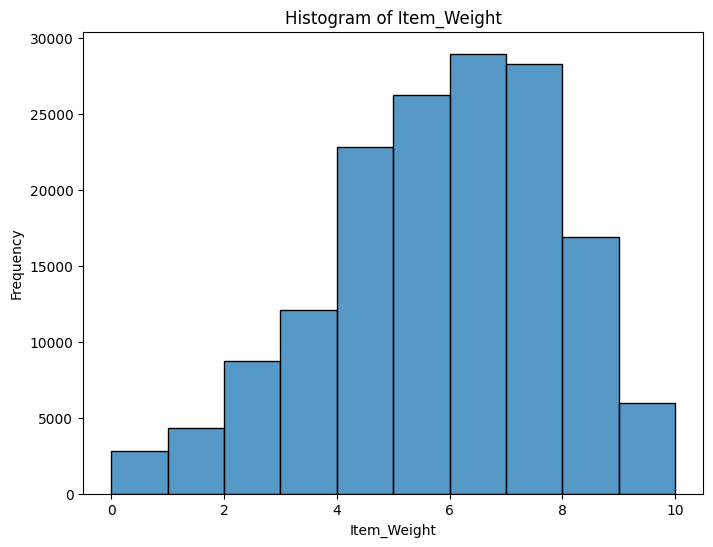

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df_full["CK"],bins=10)
plt.title("Histogram of Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

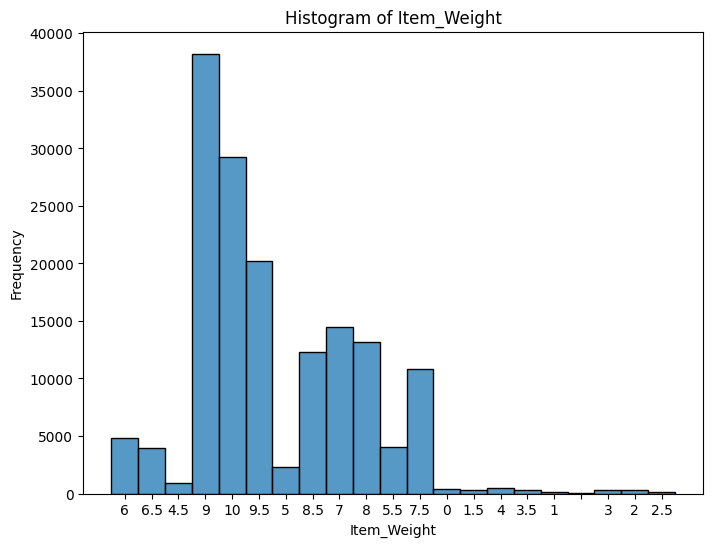

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df_full["diemqt"],bins=10)
plt.title("Histogram of Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

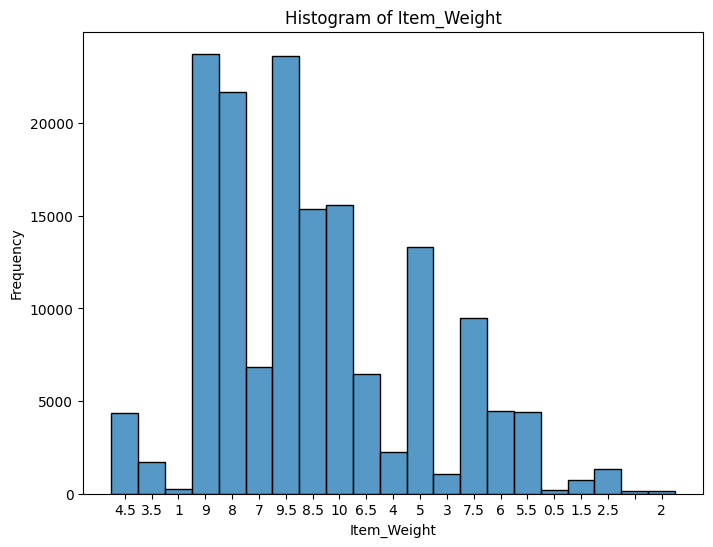

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df_full["TH"],bins=10)
plt.title("Histogram of Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel("Frequency")

In [22]:
# Bước 1: tạo 3 cột đánh dấu trạng thái từng dòng
df_full['submit_late'] = (df_full['pre_score'] == 0).astype(int)
df_full['submit_semi_late'] = ((df_full['pre_score'] > 0) & (df_full['pre_score'] < 10000)).astype(int)
df_full['submit_ontime'] = (df_full['pre_score'] == 10000).astype(int)

# Bước 2: groupby theo sinh viên
df_submit_stats = df_full.groupby('hash').agg(
    num_submit_late = ('submit_late', 'sum'),
    num_submit_semi_late = ('submit_semi_late', 'sum'),
    num_submit_ontime = ('submit_ontime', 'sum')
).reset_index()

In [25]:
print(df_full.info())

<class 'pandas.core.frame.DataFrame'>
Index: 156973 entries, 0 to 157039
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   concat('it001',`assignment_id`)  156973 non-null  object 
 1   concat('it001',`problem_id`)     156973 non-null  object 
 2   concat('it001', username)        156973 non-null  object 
 3   is_final                         156973 non-null  int64  
 4   status                           156973 non-null  object 
 5   pre_score                        156973 non-null  int64  
 6   coefficient                      156973 non-null  int64  
 7   concat('it001',`language_id`)    156973 non-null  object 
 8   created_at                       156973 non-null  object 
 9   updated_at                       156973 non-null  object 
 10  judgement                        156973 non-null  object 
 11  hash                             156973 non-null  object 
 12  CK     

In [23]:
df_full.drop(columns=['late_submit'], inplace=True)

KeyError: "['late_submit'] not found in axis"

In [26]:
df_submit_stats

,hash,num_submit_late,num_submit_semi_late,num_submit_ontime
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,55,38,54
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,83,91,85
2,01122b3ef7e59b84189e65985305f575d6bdf83c,44,92,59
3,013de369c439ab0ead8aa7da64423aa395a8be39,23,25,59
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,83,37,79
...,...,...,...,...
750,840d07858c03f80f4695056e2cc7d0c474b83a25,40,30,41
751,844f5db2e7e31ae51eba025480679ed7e4708ac6,147,102,108
752,845acd04a77b3d1b623f255d9f9f8eae90892dab,71,37,47
753,8460eaaf887a6289fb156f7562fb739ba8e9629e,209,235,113


In [27]:
df_full.head(n = 500)

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement,hash,CK,diemqt,TH,submit_late,submit_semi_late,submit_ontime
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:15:32,10-11 16:16:36,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:16:30,10-11 16:16:31,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:23:46,10-11 16:43:17,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:25:55,10-11 16:25:56,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:26:24,10-11 16:26:25,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ab06959774a036bdf57b6c6cb6c1d8c633b1f8e4,55d3ceeb6d9c90c3162f904b5c9316a869a4a070,67d64015616b9e7f49e213890b7b93a2f8796f07,0,SCORE,8888,100,it0012,10-05 09:22:53,10-05 09:23:04,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]...",67d64015616b9e7f49e213890b7b93a2f8796f07,7.5,9,9,0,1,0
496,ab06959774a036bdf57b6c6cb6c1d8c633b1f8e4,55d3ceeb6d9c90c3162f904b5c9316a869a4a070,67d64015616b9e7f49e213890b7b93a2f8796f07,0,SCORE,8888,100,it0012,10-05 09:23:16,10-05 09:23:29,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]...",67d64015616b9e7f49e213890b7b93a2f8796f07,7.5,9,9,0,1,0
497,ab06959774a036bdf57b6c6cb6c1d8c633b1f8e4,55d3ceeb6d9c90c3162f904b5c9316a869a4a070,67d64015616b9e7f49e213890b7b93a2f8796f07,0,SCORE,8888,100,it0012,10-05 09:25:38,10-05 09:25:50,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]...",67d64015616b9e7f49e213890b7b93a2f8796f07,7.5,9,9,0,1,0
498,ab06959774a036bdf57b6c6cb6c1d8c633b1f8e4,fc63e9a7e711717cbd2d94f2056830b3cc39e6d4,67d64015616b9e7f49e213890b7b93a2f8796f07,1,SCORE,10000,100,it0012,10-05 09:34:49,10-05 09:34:56,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",67d64015616b9e7f49e213890b7b93a2f8796f07,7.5,9,9,0,0,1


In [28]:
df_full['last_weighted_score'] = df_full['is_final'].astype(int) * (df_full['pre_score'] * df_full['coefficient'] / 10000)

In [29]:
df_full.head(n = 500)

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement,hash,CK,diemqt,TH,submit_late,submit_semi_late,submit_ontime,last_weighted_score
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:15:32,10-11 16:16:36,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:16:30,10-11 16:16:31,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:23:46,10-11 16:43:17,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:25:55,10-11 16:25:56,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:26:24,10-11 16:26:25,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ab06959774a036bdf57b6c6cb6c1d8c633b1f8e4,55d3ceeb6d9c90c3162f904b5c9316a869a4a070,67d64015616b9e7f49e213890b7b93a2f8796f07,0,SCORE,8888,100,it0012,10-05 09:22:53,10-05 09:23:04,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]...",67d64015616b9e7f49e213890b7b93a2f8796f07,7.5,9,9,0,1,0,0.0
496,ab06959774a036bdf57b6c6cb6c1d8c633b1f8e4,55d3ceeb6d9c90c3162f904b5c9316a869a4a070,67d64015616b9e7f49e213890b7b93a2f8796f07,0,SCORE,8888,100,it0012,10-05 09:23:16,10-05 09:23:29,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]...",67d64015616b9e7f49e213890b7b93a2f8796f07,7.5,9,9,0,1,0,0.0
497,ab06959774a036bdf57b6c6cb6c1d8c633b1f8e4,55d3ceeb6d9c90c3162f904b5c9316a869a4a070,67d64015616b9e7f49e213890b7b93a2f8796f07,0,SCORE,8888,100,it0012,10-05 09:25:38,10-05 09:25:50,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]...",67d64015616b9e7f49e213890b7b93a2f8796f07,7.5,9,9,0,1,0,0.0
498,ab06959774a036bdf57b6c6cb6c1d8c633b1f8e4,fc63e9a7e711717cbd2d94f2056830b3cc39e6d4,67d64015616b9e7f49e213890b7b93a2f8796f07,1,SCORE,10000,100,it0012,10-05 09:34:49,10-05 09:34:56,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",67d64015616b9e7f49e213890b7b93a2f8796f07,7.5,9,9,0,0,1,100.0


In [30]:
df_full['is_error'] = (df_full['status'] != 'SCORE').astype(int)
df_full.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement,hash,CK,diemqt,TH,submit_late,submit_semi_late,submit_ontime,last_weighted_score,is_error
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:15:32,10-11 16:16:36,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:16:30,10-11 16:16:31,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:23:46,10-11 16:43:17,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1
3,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:25:55,10-11 16:25:56,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1
4,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:26:24,10-11 16:26:25,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd...",0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1


In [31]:
df_full['is_success_submit'] = ((df_full['is_final'] == 1) & (df_full['coefficient'] == 100)).astype(int)
df_full.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,...,hash,CK,diemqt,TH,submit_late,submit_semi_late,submit_ontime,last_weighted_score,is_error,is_success_submit
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:15:32,10-11 16:16:36,...,0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:16:30,10-11 16:16:31,...,0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:23:46,10-11 16:43:17,...,0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1,0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:25:55,10-11 16:25:56,...,0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1,0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,10-11 16:26:24,10-11 16:26:25,...,0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1,0


In [32]:
df_full['created_at'] = pd.to_datetime(df_full['created_at'], format='%m-%d %H:%M:%S', errors='coerce')
df_full.head(n=5)

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,...,hash,CK,diemqt,TH,submit_late,submit_semi_late,submit_ontime,last_weighted_score,is_error,is_success_submit
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:15:32,10-11 16:16:36,...,0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:16:30,10-11 16:16:31,...,0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:23:46,10-11 16:43:17,...,0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1,0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:25:55,10-11 16:25:56,...,0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1,0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:26:24,10-11 16:26:25,...,0bd2037bf68a97753e5e67ab55dac026a649f279,1.0,6,4.5,1,0,0,0.0,1,0


In [33]:
# Bước 1: chuẩn hóa thời gian
df_full['created_at'] = pd.to_datetime(df_full['created_at'], format='%m-%d %H:%M:%S', errors='coerce')

# Bước 2: tìm thời điểm bắt đầu làm từng bài (min theo hash + problem)
df_start_time = df_full.groupby(['hash', "concat('it001',`problem_id`)"])['created_at'].min().reset_index()
df_start_time = df_start_time.rename(columns={'created_at': 'assignment_start_time'})

# Bước 3: merge ngược lại để mỗi dòng biết lúc nào bắt đầu assignment đó
df_full = df_full.merge(df_start_time, on=['hash', "concat('it001',`problem_id`)"], how='left')

# Bước 4: tính thời gian làm bài tính đến dòng hiện tại
df_full['time_spent_hours'] = (df_full['created_at'] - df_full['assignment_start_time']).dt.total_seconds() / 3600
df_full.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,...,diemqt,TH,submit_late,submit_semi_late,submit_ontime,last_weighted_score,is_error,is_success_submit,assignment_start_time,time_spent_hours
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:15:32,10-11 16:16:36,...,6,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.000000
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:16:30,10-11 16:16:31,...,6,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.016111
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:23:46,10-11 16:43:17,...,6,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.137222
3,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:25:55,10-11 16:25:56,...,6,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.173056
4,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:26:24,10-11 16:26:25,...,6,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.181111


In [34]:
# Lọc những dòng là lần final nộp cho mỗi assignment
df_final_submits = df_full[df_full['is_final'] == 1].copy()

# Lấy giờ nộp final
df_final_submits['final_hour'] = df_final_submits['created_at'].dt.hour

# Tạo bảng ánh xạ (hash, assignment) → giờ nộp final
df_final_hour_map = df_final_submits[[
    'hash',
    "concat('it001',`problem_id`)",
    'final_hour'
]]

In [35]:
df_full = df_full.merge(
    df_final_hour_map,
    on=['hash', "concat('it001',`problem_id`)"],
    how='left'
)

In [36]:
df_full.head(n= 10)

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,...,TH,submit_late,submit_semi_late,submit_ontime,last_weighted_score,is_error,is_success_submit,assignment_start_time,time_spent_hours,final_hour
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:15:32,10-11 16:16:36,...,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.000000,16.0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:16:30,10-11 16:16:31,...,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.016111,16.0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:23:46,10-11 16:43:17,...,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.137222,16.0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:25:55,10-11 16:25:56,...,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.173056,16.0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:26:24,10-11 16:26:25,...,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.181111,16.0
5,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:29:15,10-11 16:29:15,...,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.228611,16.0
6,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:29:55,10-11 16:29:55,...,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.239722,16.0
7,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:31:38,10-11 16:31:38,...,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.268333,16.0
8,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:32:53,10-11 16:32:53,...,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.289167,16.0
9,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:34:04,10-11 16:34:05,...,4.5,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.308889,16.0


In [37]:
df_full['submit_weekday'] = df_full['created_at'].dt.dayofweek
df_full.head(n = 5)

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,...,submit_late,submit_semi_late,submit_ontime,last_weighted_score,is_error,is_success_submit,assignment_start_time,time_spent_hours,final_hour,submit_weekday
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:15:32,10-11 16:16:36,...,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.000000,16.0,3.0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:16:30,10-11 16:16:31,...,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.016111,16.0,3.0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:23:46,10-11 16:43:17,...,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.137222,16.0,3.0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:25:55,10-11 16:25:56,...,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.173056,16.0,3.0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:26:24,10-11 16:26:25,...,1,0,0,0.0,1,0,1900-10-11 16:15:32,0.181111,16.0,3.0


In [38]:
df_full['created_at'] = pd.to_datetime(df_full['created_at'], errors='coerce')
df_full['submit_date'] = df_full['created_at'].dt.date

# Tính khoảng thời gian mỗi ngày mỗi sinh viên
df_daily_time = df_full.groupby(['hash', 'submit_date'])['created_at'].agg(['min', 'max']).reset_index()
df_daily_time['hours_spent'] = (df_daily_time['max'] - df_daily_time['min']).dt.total_seconds() / 3600
df_avg_time = df_daily_time.groupby('hash')['hours_spent'].mean().reset_index()
df_avg_time.columns = ['hash', 'avg_hours_per_day']

In [39]:
df_full = df_full.merge(df_avg_time, on='hash', how='left')
df_full.head(n=5)

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,...,submit_ontime,last_weighted_score,is_error,is_success_submit,assignment_start_time,time_spent_hours,final_hour,submit_weekday,submit_date,avg_hours_per_day
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:15:32,10-11 16:16:36,...,0,0.0,1,0,1900-10-11 16:15:32,0.000000,16.0,3.0,1900-10-11,1.676728
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:16:30,10-11 16:16:31,...,0,0.0,1,0,1900-10-11 16:15:32,0.016111,16.0,3.0,1900-10-11,1.676728
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:23:46,10-11 16:43:17,...,0,0.0,1,0,1900-10-11 16:15:32,0.137222,16.0,3.0,1900-10-11,1.676728
3,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:25:55,10-11 16:25:56,...,0,0.0,1,0,1900-10-11 16:15:32,0.173056,16.0,3.0,1900-10-11,1.676728
4,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:26:24,10-11 16:26:25,...,0,0.0,1,0,1900-10-11 16:15:32,0.181111,16.0,3.0,1900-10-11,1.676728


In [40]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165720 entries, 0 to 165719
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   concat('it001',`assignment_id`)  165720 non-null  object        
 1   concat('it001',`problem_id`)     165720 non-null  object        
 2   concat('it001', username)        165720 non-null  object        
 3   is_final                         165720 non-null  int64         
 4   status                           165720 non-null  object        
 5   pre_score                        165720 non-null  int64         
 6   coefficient                      165720 non-null  int64         
 7   concat('it001',`language_id`)    165720 non-null  object        
 8   created_at                       165717 non-null  datetime64[ns]
 9   updated_at                       165720 non-null  object        
 10  judgement                        165720 non-

In [41]:
df_working_days = df_full.groupby('hash')['submit_date'].nunique().reset_index()
df_working_days.columns = ['hash', 'total_working_days']
df_full = df_full.merge(df_working_days, on='hash', how='left')
df_full.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,...,last_weighted_score,is_error,is_success_submit,assignment_start_time,time_spent_hours,final_hour,submit_weekday,submit_date,avg_hours_per_day,total_working_days
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:15:32,10-11 16:16:36,...,0.0,1,0,1900-10-11 16:15:32,0.000000,16.0,3.0,1900-10-11,1.676728,18
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:16:30,10-11 16:16:31,...,0.0,1,0,1900-10-11 16:15:32,0.016111,16.0,3.0,1900-10-11,1.676728,18
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:23:46,10-11 16:43:17,...,0.0,1,0,1900-10-11 16:15:32,0.137222,16.0,3.0,1900-10-11,1.676728,18
3,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:25:55,10-11 16:25:56,...,0.0,1,0,1900-10-11 16:15:32,0.173056,16.0,3.0,1900-10-11,1.676728,18
4,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,0bd2037bf68a97753e5e67ab55dac026a649f279,0,Compilation Error,0,100,it0012,1900-10-11 16:26:24,10-11 16:26:25,...,0.0,1,0,1900-10-11 16:15:32,0.181111,16.0,3.0,1900-10-11,1.676728,18


In [42]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165720 entries, 0 to 165719
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   concat('it001',`assignment_id`)  165720 non-null  object        
 1   concat('it001',`problem_id`)     165720 non-null  object        
 2   concat('it001', username)        165720 non-null  object        
 3   is_final                         165720 non-null  int64         
 4   status                           165720 non-null  object        
 5   pre_score                        165720 non-null  int64         
 6   coefficient                      165720 non-null  int64         
 7   concat('it001',`language_id`)    165720 non-null  object        
 8   created_at                       165717 non-null  datetime64[ns]
 9   updated_at                       165720 non-null  object        
 10  judgement                        165720 non-

In [43]:
df_features = df_scores.copy()
df_features.head()

,hash,CK,diemqt,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5,7.5,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5,7,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5,9,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0,10,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0,9,6


In [45]:
valid_hashes = df_scores['hash'].unique()
df_filtered = df_full[df_full['hash'].isin(valid_hashes)]
df_submit_counts = df_filtered.groupby('hash').size().reset_index(name='num_total_submissions')
df_features = df_features.merge(df_submit_counts, on='hash', how='left')
df_features.head()

,hash,CK,diemqt,TH,num_success_submit,num_total_submissions
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5,7.5,5,48.0,158.0
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5,7,8.5,78.0,259.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5,9,7,71.0,224.0
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0,10,10,98.0,154.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0,9,6,90.0,199.0


In [46]:
df_success_submit_count = df_full.groupby('hash')['is_success_submit'].sum().reset_index()
df_success_submit_count.columns = ['hash', 'num_success_submit']
df_features = df_features.merge(df_success_submit_count, on='hash', how='left')


In [47]:
df_features.head(n = 10)

,hash,CK,diemqt,TH,num_success_submit_x,num_total_submissions,num_success_submit_y
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5,7.5,5,48.0,158.0,48.0
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5,7,8.5,78.0,259.0,78.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5,9,7,71.0,224.0,71.0
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0,10,10,98.0,154.0,98.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0,9,6,90.0,199.0,90.0
5,0155f91fe242fe55e1af631b0f0afbe9938b185c,4.0,9,7.5,93.0,271.0,93.0
6,016f87a7bd87f233a8633fba8a1ca7ef5c3c63c1,6.5,8,8,77.0,364.0,77.0
7,017ec1bbad0d598e5a86ac3bd595b870b6456e61,4.0,8,8.5,91.0,218.0,91.0
8,01ad03ec301749c033155fc17e657cc767d447c8,5.5,7,7.5,78.0,282.0,78.0
9,020ef1c31cb4751bbfa1a88fba782db3c402e2fa,5.0,9,5.5,101.0,244.0,101.0


In [48]:
df_submit_types = df_full.groupby('hash')[[
    'submit_late',
    'submit_semi_late',
    'submit_ontime'
]].sum().reset_index()

# (Optional) Đổi tên cho rõ ràng
df_submit_types = df_submit_types.rename(columns={
    'submit_late': 'num_submit_late',
    'submit_semi_late': 'num_submit_semi_late',
    'submit_ontime': 'num_submit_ontime'
})
df_features = df_features.merge(df_submit_types, on='hash', how='left')
df_features.head()

,hash,CK,diemqt,TH,num_success_submit_x,num_total_submissions,num_success_submit_y,num_submit_late,num_submit_semi_late,num_submit_ontime
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5,7.5,5,48.0,158.0,48.0,56.0,45.0,57.0
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5,7,8.5,78.0,259.0,78.0,83.0,91.0,85.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5,9,7,71.0,224.0,71.0,45.0,117.0,62.0
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0,10,10,98.0,154.0,98.0,35.0,25.0,94.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0,9,6,90.0,199.0,90.0,83.0,37.0,79.0


In [49]:
df_avg_last_score = df_full.groupby('hash')['last_weighted_score'].mean().reset_index()
df_avg_last_score.columns = ['hash', 'avg_last_weighted_score']
df_features = df_features.merge(df_avg_last_score, on='hash', how='left')
df_features.head()

,hash,CK,diemqt,TH,num_success_submit_x,num_total_submissions,num_success_submit_y,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5,7.5,5,48.0,158.0,48.0,56.0,45.0,57.0,30.379747
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5,7,8.5,78.0,259.0,78.0,83.0,91.0,85.0,29.054015
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5,9,7,71.0,224.0,71.0,45.0,117.0,62.0,29.684286
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0,10,10,98.0,154.0,98.0,35.0,25.0,94.0,61.202532
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0,9,6,90.0,199.0,90.0,83.0,37.0,79.0,40.000000


In [50]:
df_error_count = df_full.groupby('hash')['is_error'].sum().reset_index()
df_error_count.columns = ['hash', 'num_error_submissions']
df_features = df_features.merge(df_error_count, on='hash', how='left')
df_features.head()

,hash,CK,diemqt,TH,num_success_submit_x,num_total_submissions,num_success_submit_y,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5,7.5,5,48.0,158.0,48.0,56.0,45.0,57.0,30.379747,28.0
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5,7,8.5,78.0,259.0,78.0,83.0,91.0,85.0,29.054015,50.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5,9,7,71.0,224.0,71.0,45.0,117.0,62.0,29.684286,21.0
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0,10,10,98.0,154.0,98.0,35.0,25.0,94.0,61.202532,19.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0,9,6,90.0,199.0,90.0,83.0,37.0,79.0,40.000000,45.0


In [51]:
df_problem_time = df_full.groupby(['hash', "concat('it001',`problem_id`)"])['created_at'].agg(['min', 'max']).reset_index()
df_problem_time['total_time_hours'] = (df_problem_time['max'] - df_problem_time['min']).dt.total_seconds() / 3600
df_avg_time_per_problem = df_problem_time.groupby('hash')['total_time_hours'].mean().reset_index()
df_avg_time_per_problem.columns = ['hash', 'avg_time_per_problem']
df_features = df_features.merge(df_avg_time_per_problem, on='hash', how='left')
df_features.head()

,hash,CK,diemqt,TH,num_success_submit_x,num_total_submissions,num_success_submit_y,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions,avg_time_per_problem
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5,7.5,5,48.0,158.0,48.0,56.0,45.0,57.0,30.379747,28.0,8.022832
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5,7,8.5,78.0,259.0,78.0,83.0,91.0,85.0,29.054015,50.0,239.968914
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5,9,7,71.0,224.0,71.0,45.0,117.0,62.0,29.684286,21.0,101.558443
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0,10,10,98.0,154.0,98.0,35.0,25.0,94.0,61.202532,19.0,61.358958
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0,9,6,90.0,199.0,90.0,83.0,37.0,79.0,40.000000,45.0,228.572941


In [52]:
def hour_to_period_encoded(hour):
    if pd.isna(hour): return -1  # Không rõ
    if 7 <= hour < 12: return 0   # Đêm
    elif 12 <= hour < 19: return 1  # Sáng
    elif 19 <= hour < 23: return 2  # Chiều
    else: return 3  # Tối
# B1: Gán trực tiếp final_period_encoded từ final_hour
df_final_period = df_full[df_full['final_hour'].notna()].copy()
df_final_period['final_period_encoded'] = df_final_period['final_hour'].apply(hour_to_period_encoded)

# B2: Lấy mode theo hash
def mode_or_first(series):
    modes = series.mode()
    return modes.iloc[0] if not modes.empty else -1  # fallback là "Không rõ"

df_final_encoded_mode = df_final_period.groupby('hash')['final_period_encoded'].apply(mode_or_first).reset_index()

# B3: Gộp vào df_features
df_features = df_features.merge(df_final_encoded_mode, on='hash', how='left')

In [53]:
df_features.head()

,hash,CK,diemqt,TH,num_success_submit_x,num_total_submissions,num_success_submit_y,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions,avg_time_per_problem,final_period_encoded
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5,7.5,5,48.0,158.0,48.0,56.0,45.0,57.0,30.379747,28.0,8.022832,3.0
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5,7,8.5,78.0,259.0,78.0,83.0,91.0,85.0,29.054015,50.0,239.968914,1.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5,9,7,71.0,224.0,71.0,45.0,117.0,62.0,29.684286,21.0,101.558443,1.0
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0,10,10,98.0,154.0,98.0,35.0,25.0,94.0,61.202532,19.0,61.358958,0.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0,9,6,90.0,199.0,90.0,83.0,37.0,79.0,40.000000,45.0,228.572941,1.0


In [54]:
df_full['submit_weekday'] = df_full['created_at'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df_weekday_counts = df_full.groupby(['hash', 'submit_weekday']).size().unstack(fill_value=0).reset_index()
df_weekday_counts.columns = ['hash'] + [f'num_submit_weekday_{i}' for i in range(7)]
# Hoặc đặt tên thân thiện:
weekday_map = {
    0: 'mon', 1: 'tue', 2: 'wed', 3: 'thu', 4: 'fri', 5: 'sat', 6: 'sun'
}
df_weekday_counts.rename(columns={i: f'num_submit_{name}' for i, name in weekday_map.items()}, inplace=True)
df_features = df_features.merge(df_weekday_counts, on='hash', how='left')
df_features.head()

,hash,CK,diemqt,TH,num_success_submit_x,num_total_submissions,num_success_submit_y,num_submit_late,num_submit_semi_late,num_submit_ontime,...,num_error_submissions,avg_time_per_problem,final_period_encoded,num_submit_weekday_0,num_submit_weekday_1,num_submit_weekday_2,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5,7.5,5,48.0,158.0,48.0,56.0,45.0,57.0,...,28.0,8.022832,3.0,6.0,3.0,33.0,84.0,13.0,16.0,3.0
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5,7,8.5,78.0,259.0,78.0,83.0,91.0,85.0,...,50.0,239.968914,1.0,5.0,60.0,56.0,115.0,14.0,7.0,2.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5,9,7,71.0,224.0,71.0,45.0,117.0,62.0,...,21.0,101.558443,1.0,18.0,48.0,23.0,50.0,40.0,19.0,26.0
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0,10,10,98.0,154.0,98.0,35.0,25.0,94.0,...,19.0,61.358958,0.0,3.0,102.0,0.0,33.0,16.0,0.0,0.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0,9,6,90.0,199.0,90.0,83.0,37.0,79.0,...,45.0,228.572941,1.0,47.0,7.0,21.0,33.0,45.0,30.0,16.0


In [55]:
df_features = df_features.merge(df_avg_time, on='hash', how='left')
df_features.head()

,hash,CK,diemqt,TH,num_success_submit_x,num_total_submissions,num_success_submit_y,num_submit_late,num_submit_semi_late,num_submit_ontime,...,avg_time_per_problem,final_period_encoded,num_submit_weekday_0,num_submit_weekday_1,num_submit_weekday_2,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6,avg_hours_per_day
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5,7.5,5,48.0,158.0,48.0,56.0,45.0,57.0,...,8.022832,3.0,6.0,3.0,33.0,84.0,13.0,16.0,3.0,2.489345
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5,7,8.5,78.0,259.0,78.0,83.0,91.0,85.0,...,239.968914,1.0,5.0,60.0,56.0,115.0,14.0,7.0,2.0,4.601000
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5,9,7,71.0,224.0,71.0,45.0,117.0,62.0,...,101.558443,1.0,18.0,48.0,23.0,50.0,40.0,19.0,26.0,4.809767
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0,10,10,98.0,154.0,98.0,35.0,25.0,94.0,...,61.358958,0.0,3.0,102.0,0.0,33.0,16.0,0.0,0.0,2.096181
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0,9,6,90.0,199.0,90.0,83.0,37.0,79.0,...,228.572941,1.0,47.0,7.0,21.0,33.0,45.0,30.0,16.0,2.428283


In [56]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hash                     761 non-null    object 
 1   CK                       755 non-null    float64
 2   diemqt                   755 non-null    object 
 3   TH                       755 non-null    object 
 4   num_success_submit_x     755 non-null    float64
 5   num_total_submissions    755 non-null    float64
 6   num_success_submit_y     755 non-null    float64
 7   num_submit_late          755 non-null    float64
 8   num_submit_semi_late     755 non-null    float64
 9   num_submit_ontime        755 non-null    float64
 10  avg_last_weighted_score  755 non-null    float64
 11  num_error_submissions    755 non-null    float64
 12  avg_time_per_problem     755 non-null    float64
 13  final_period_encoded     755 non-null    float64
 14  num_submit_weekday_0     7

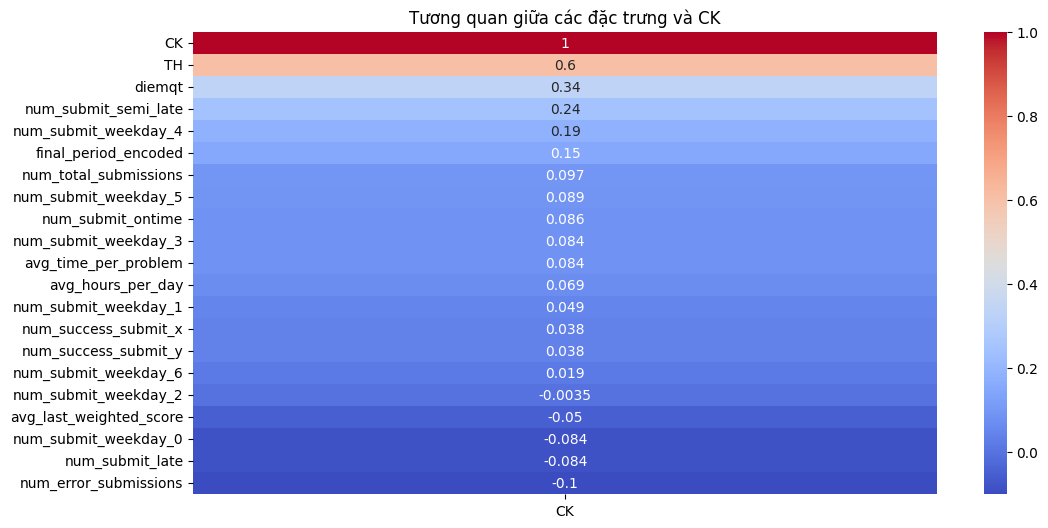

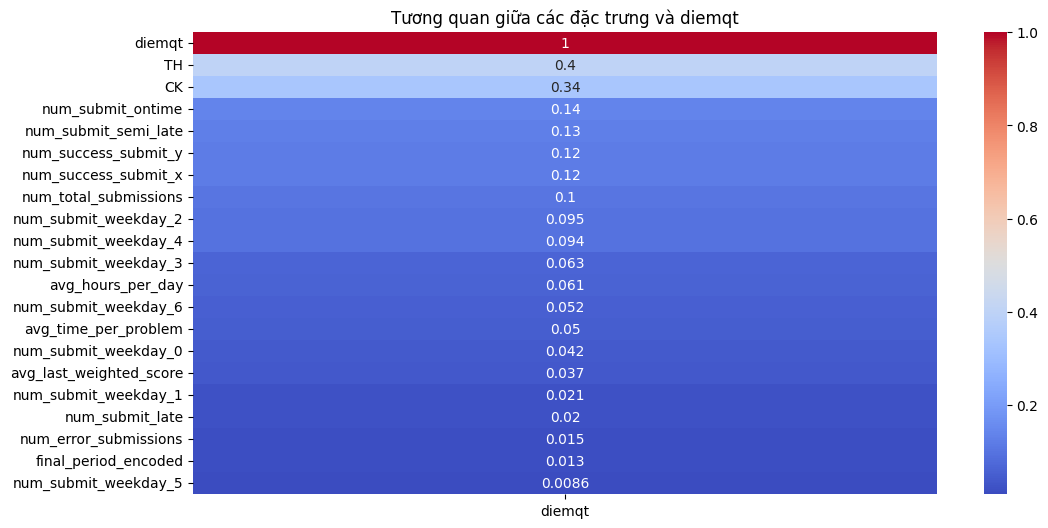

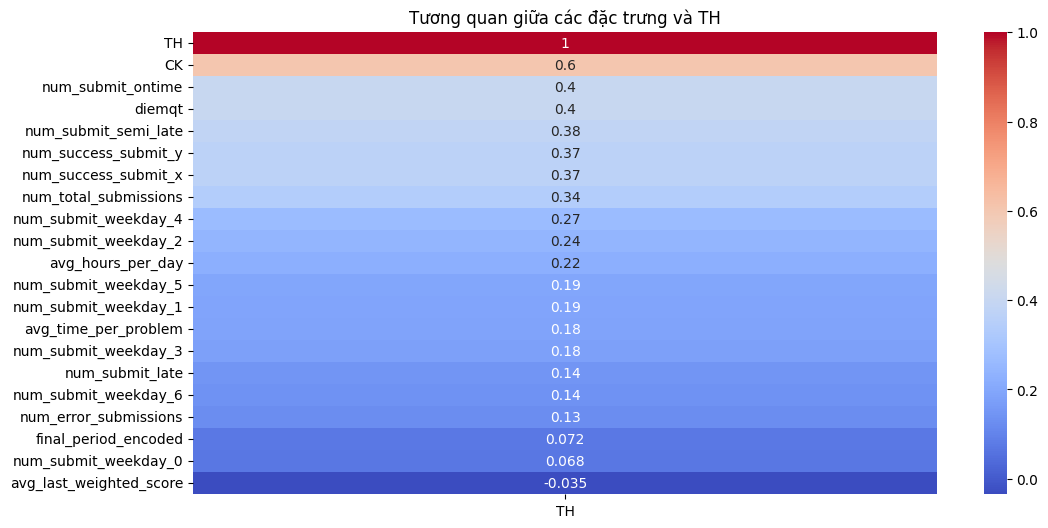

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chuyển các biến mục tiêu về số nếu chưa
df_corr = df_features.copy()
df_corr['CK'] = pd.to_numeric(df_corr['CK'], errors='coerce')
df_corr['diemqt'] = pd.to_numeric(df_corr['diemqt'], errors='coerce')
df_corr['TH'] = pd.to_numeric(df_corr['TH'], errors='coerce')

# Tính ma trận tương quan
target_cols = ['CK', 'diemqt', 'TH']
for target in target_cols:
    plt.figure(figsize=(12, 6))
    corr = df_corr.corr(numeric_only=True)[[target]].sort_values(by=target, ascending=False)
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f'Tương quan giữa các đặc trưng và {target}')
    plt.show()

In [58]:
df_f_raw = df_features.copy()

In [59]:
df_features = df_f_raw

In [60]:
df_features = df_features.dropna()

In [61]:
cols_to_scale = [
    'num_total_submissions', 'num_success_submit',
    'num_submit_late', 'num_submit_semi_late', 'num_submit_ontime',
    'avg_last_weighted_score', 'num_error_submissions',
    'avg_time_per_problem', 'avg_hours_per_day',
    'num_submit_weekday_0', 'num_submit_weekday_1', 'num_submit_weekday_2',
    'num_submit_weekday_3', 'num_submit_weekday_4', 'num_submit_weekday_5',
    'num_submit_weekday_6'
]
 


In [62]:
df_features.head()

,hash,CK,diemqt,TH,num_success_submit_x,num_total_submissions,num_success_submit_y,num_submit_late,num_submit_semi_late,num_submit_ontime,...,avg_time_per_problem,final_period_encoded,num_submit_weekday_0,num_submit_weekday_1,num_submit_weekday_2,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6,avg_hours_per_day
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5,7.5,5,48.0,158.0,48.0,56.0,45.0,57.0,...,8.022832,3.0,6.0,3.0,33.0,84.0,13.0,16.0,3.0,2.489345
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5,7,8.5,78.0,259.0,78.0,83.0,91.0,85.0,...,239.968914,1.0,5.0,60.0,56.0,115.0,14.0,7.0,2.0,4.601000
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5,9,7,71.0,224.0,71.0,45.0,117.0,62.0,...,101.558443,1.0,18.0,48.0,23.0,50.0,40.0,19.0,26.0,4.809767
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0,10,10,98.0,154.0,98.0,35.0,25.0,94.0,...,61.358958,0.0,3.0,102.0,0.0,33.0,16.0,0.0,0.0,2.096181
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0,9,6,90.0,199.0,90.0,83.0,37.0,79.0,...,228.572941,1.0,47.0,7.0,21.0,33.0,45.0,30.0,16.0,2.428283


In [64]:
import re
print("Giá trị bị mất sau khi làm sạch:")
print(df_features[['CK', 'diemqt', 'TH']].isna().sum())

print("\nMột số giá trị gốc gây lỗi có thể là:")
for col in ['CK', 'diemqt', 'TH']:
    raw_vals = df_f_raw[col].unique()
    print(f"\n{col}:", [v for v in raw_vals if isinstance(v, str) and not re.match(r'^\s*\d+(\.\d+)?\s*$', v)])


Giá trị bị mất sau khi làm sạch:
CK        0
diemqt    0
TH        0
dtype: int64

Một số giá trị gốc gây lỗi có thể là:

CK: []

diemqt: ['\xa0']

TH: ['\xa0']


In [65]:
import re

def clean_score_column(col):
    return (
        df_features[col]
        .astype(str)
        .apply(lambda x: re.sub(r'[^\d\.]', '', x))  # giữ lại số & dấu chấm
        .replace('', np.nan)
        .astype(float)
    )

for col in ['CK', 'diemqt', 'TH']:
    df_features[col] = clean_score_column(col)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3100\1713813284.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[col] = clean_score_column(col)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3100\1713813284.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[col] = clean_score_column(col)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3100\1713813284.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [66]:
df_features['diemqt'] = df_features['diemqt'].replace('\xa0', 0).astype(float)
df_features['TH'] = df_features['TH'].replace('\xa0', 0).astype(float)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3100\319264358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['diemqt'] = df_features['diemqt'].replace('\xa0', 0).astype(float)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3100\319264358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['TH'] = df_features['TH'].replace('\xa0', 0).astype(float)


In [68]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Xử lý dữ liệu
df = df_features.dropna()

X = df.drop(columns=['hash', 'CK', 'diemqt', 'TH'])
y = df['TH']  # hoặc 'diemqt' hoặc 'TH'

# 2. Chuẩn hóa dữ liệu số
X_cat = X[['final_period_encoded']]
X_num = X.drop(columns=['final_period_encoded'])

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

X_processed = np.hstack([X_num_scaled, X_cat.values])

# 3. Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# 4. Khởi tạo và huấn luyện LightGBM
model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)
model.fit(X_train, y_train)

# 5. Dự đoán và đánh giá
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ MAE: {mae:.4f}")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2039
[LightGBM] [Info] Number of data points in the train set: 602, number of used features: 18
[LightGBM] [Info] Start training from score 7.266611
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [69]:
# Tìm tất cả cột chứa dạng object (string)
obj_cols = df_features.select_dtypes(include='object').columns

# In ra những cột có ít nhất một giá trị chứa '\xa0'
for col in obj_cols:
    if df_features[col].astype(str).str.contains('\xa0').any():
        print(f"Cột '{col}' có chứa ký tự '\\xa0'")

In [70]:
# In tất cả các giá trị duy nhất trong diemqt chứa '\xa0'
print("Các giá trị lỗi trong 'diemqt':")
print(df_features.loc[df_features['diemqt'].astype(str).str.contains('\xa0'), 'diemqt'].unique())

print("\nCác giá trị lỗi trong 'TH':")
print(df_features.loc[df_features['TH'].astype(str).str.contains('\xa0'), 'TH'].unique())


Các giá trị lỗi trong 'diemqt':
[]

Các giá trị lỗi trong 'TH':
[]
